In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
data=pd.read_csv("https://raw.githubusercontent.com/training-ml/Files/main/titanic_train.csv")
data.head()

,Unnamed: 0,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
data.drop(columns="Unnamed: 0",inplace=True)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [5]:
data.shape

(891, 12)

In [6]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
data['Age']=data['Age'].replace(np.NaN,data['Age'].mean())
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
char_cabin=data['Cabin'].astype(str)
char_cabin=np.array([cabin[0] for cabin in char_cabin])
new_cabin=pd.Categorical(char_cabin)

In [9]:
data["Cabin"]=new_cabin

In [10]:
data["Cabin"].value_counts()

n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [11]:
data["Cabin"]=data["Cabin"].replace('n','C')

In [12]:
data["Cabin"].value_counts()

C    746
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

In [13]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [14]:
data=data.dropna()
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [15]:
data.shape

(889, 12)

In [16]:
new_sex=pd.Categorical(data['Sex'])
new_sex=new_sex.rename_categories([0,1])
data['Sex']=new_sex

In [17]:
data.Sex.value_counts()  #Here 1 is for Male & 0 for Female

1    577
0    312
Name: Sex, dtype: int64

In [18]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,C,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,C,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,C,S


In [19]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000,889.000000
mean,446.000000,0.382452,2.311586,29.653446,0.524184,0.382452,32.096681
std,256.998173,0.486260,0.834700,12.968366,1.103705,0.806761,49.697504
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,224.000000,0.000000,2.000000,22.000000,0.000000,0.000000,7.895800
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.000000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


<AxesSubplot:xlabel='Cabin', ylabel='count'>

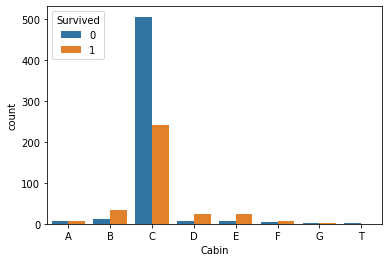

In [20]:
sns.countplot(x="Cabin",hue="Survived",data=data)

<AxesSubplot:xlabel='Embarked', ylabel='count'>

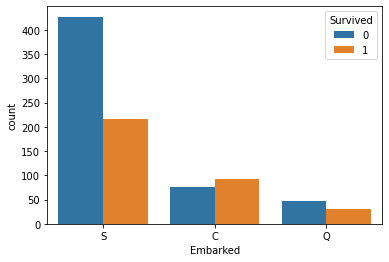

In [21]:
sns.countplot(x="Embarked",hue="Survived",data=data)

In [22]:
data.drop(columns='Name',inplace=True)
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,1,22.0,1,0,A/5 21171,7.2500,C,S
1,2,1,1,0,38.0,1,0,PC 17599,71.2833,C,C
2,3,1,3,0,26.0,0,0,STON/O2. 3101282,7.9250,C,S
3,4,1,1,0,35.0,1,0,113803,53.1000,C,S
4,5,0,3,1,35.0,0,0,373450,8.0500,C,S


<AxesSubplot:xlabel='Sex', ylabel='count'>

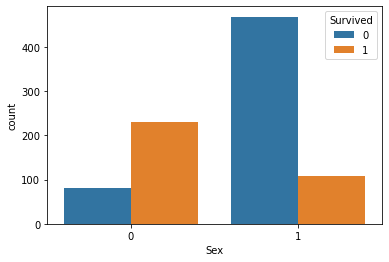

In [23]:
sns.countplot(x='Sex',hue='Survived',data=data)

In [24]:
data.drop(columns='Ticket',inplace=True)

In [25]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Cabin', 'Embarked'],
      dtype='object')

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

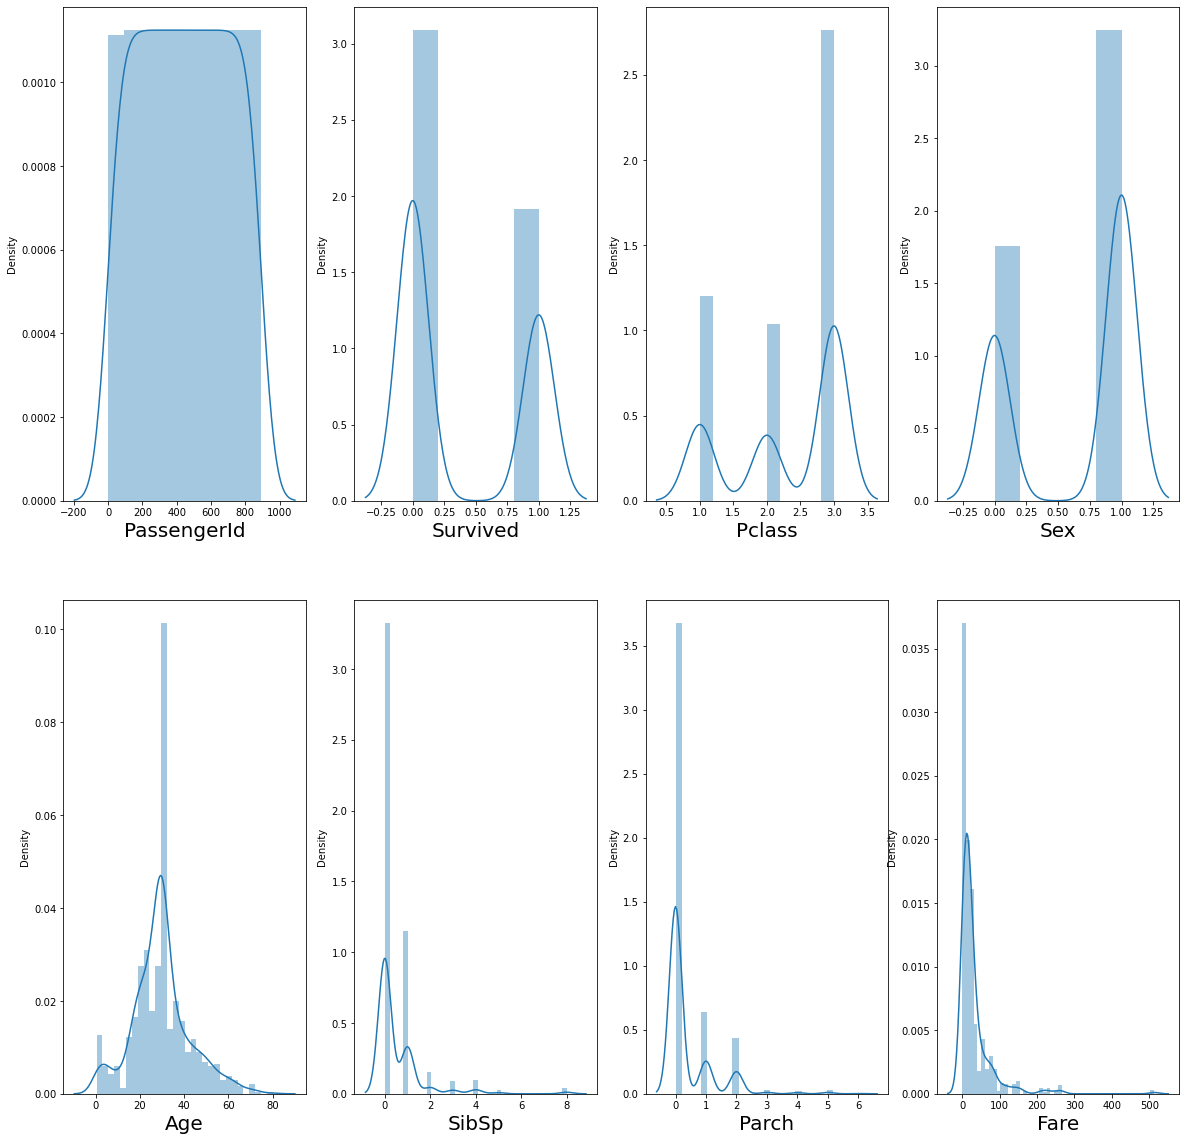

In [26]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=8:
        ax=plt.subplot(2,4,plotno)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.format("Vertical", "x"))
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_core.py:1303: UserWarning: Vertical orientation ignored with only `x` specified.
  warnings.warn(single_var_warning.forma

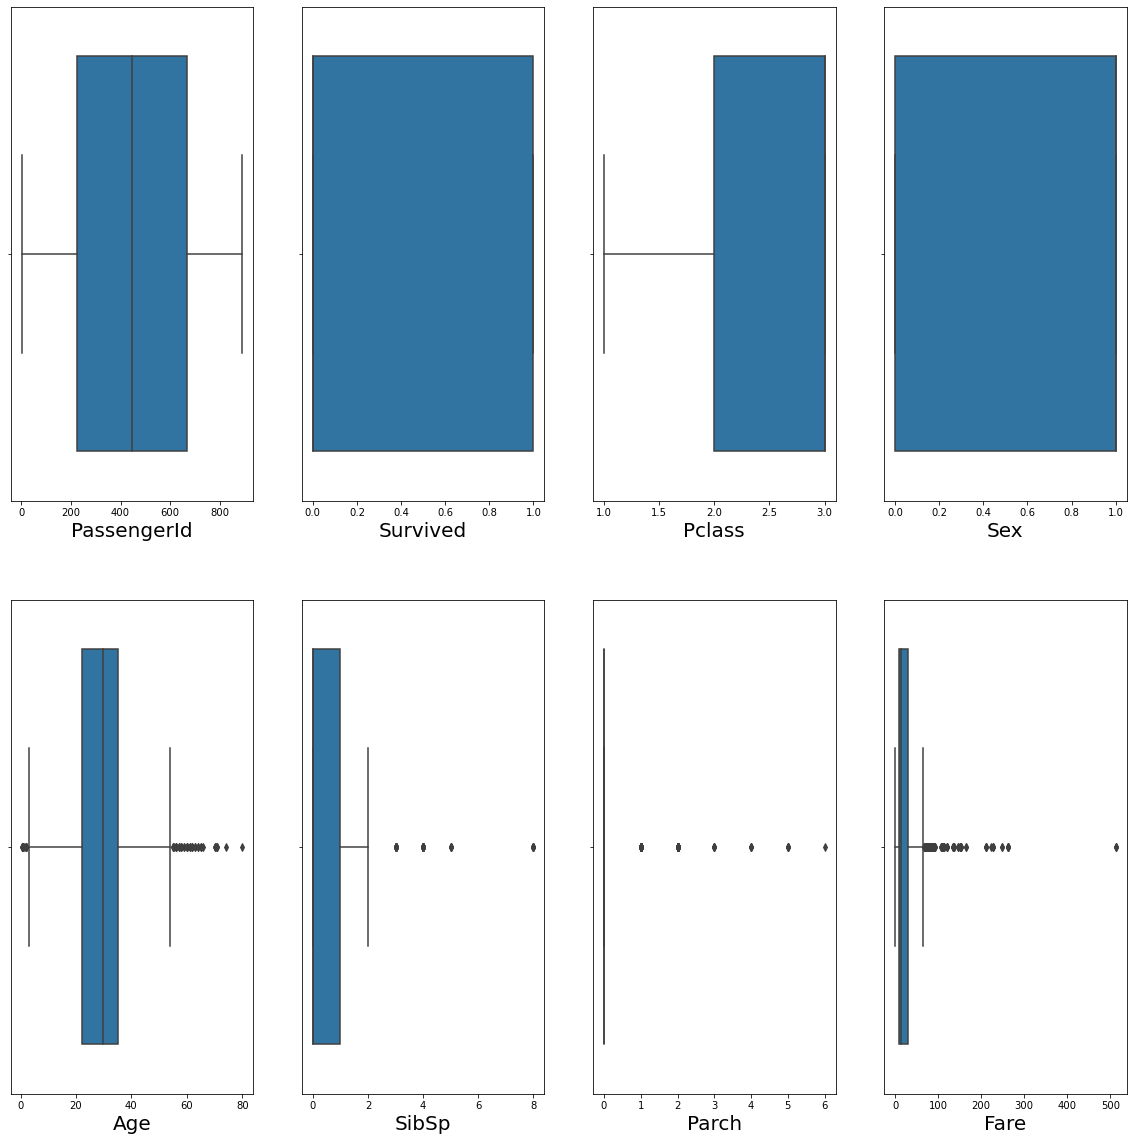

In [27]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=8:
        ax=plt.subplot(2,4,plotno)
        sns.boxplot(data[col],orient='v')
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

In [28]:
q1=data.quantile(.25)
q3=data.quantile(.75)
iqr=q3-q1


In [29]:
age_high=q3.Age+1.5*iqr.Age
age_low=q1.Age-1.5*iqr.Age
index=np.where((data.Age>age_high)&(data.Age<age_low))

data.drop(data.index[index],inplace=True)
print("Shape:",data.shape)

data.reset_index()


Shape: (889, 10)


,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1,0,3,1,22.000000,1,0,7.2500,C,S
1,1,2,1,1,0,38.000000,1,0,71.2833,C,C
2,2,3,1,3,0,26.000000,0,0,7.9250,C,S
3,3,4,1,1,0,35.000000,1,0,53.1000,C,S
4,4,5,0,3,1,35.000000,0,0,8.0500,C,S
...,...,...,...,...,...,...,...,...,...,...,...
884,886,887,0,2,1,27.000000,0,0,13.0000,C,S
885,887,888,1,1,0,19.000000,0,0,30.0000,B,S
886,888,889,0,3,0,29.699118,1,2,23.4500,C,S
887,889,890,1,1,1,26.000000,0,0,30.0000,C,C


In [30]:
high=q3.SibSp+1.5*iqr.SibSp
low=q1.SibSp-1.5*iqr.SibSp
index=np.where((data.SibSp>high)&(data.SibSp<low))

data.drop(data.index[index],inplace=True)
print("Shape:",data.shape)

data.reset_index()

Shape: (889, 10)


,index,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
0,0,1,0,3,1,22.000000,1,0,7.2500,C,S
1,1,2,1,1,0,38.000000,1,0,71.2833,C,C
2,2,3,1,3,0,26.000000,0,0,7.9250,C,S
3,3,4,1,1,0,35.000000,1,0,53.1000,C,S
4,4,5,0,3,1,35.000000,0,0,8.0500,C,S
...,...,...,...,...,...,...,...,...,...,...,...
884,886,887,0,2,1,27.000000,0,0,13.0000,C,S
885,887,888,1,1,0,19.000000,0,0,30.0000,B,S
886,888,889,0,3,0,29.699118,1,2,23.4500,C,S
887,889,890,1,1,1,26.000000,0,0,30.0000,C,C


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

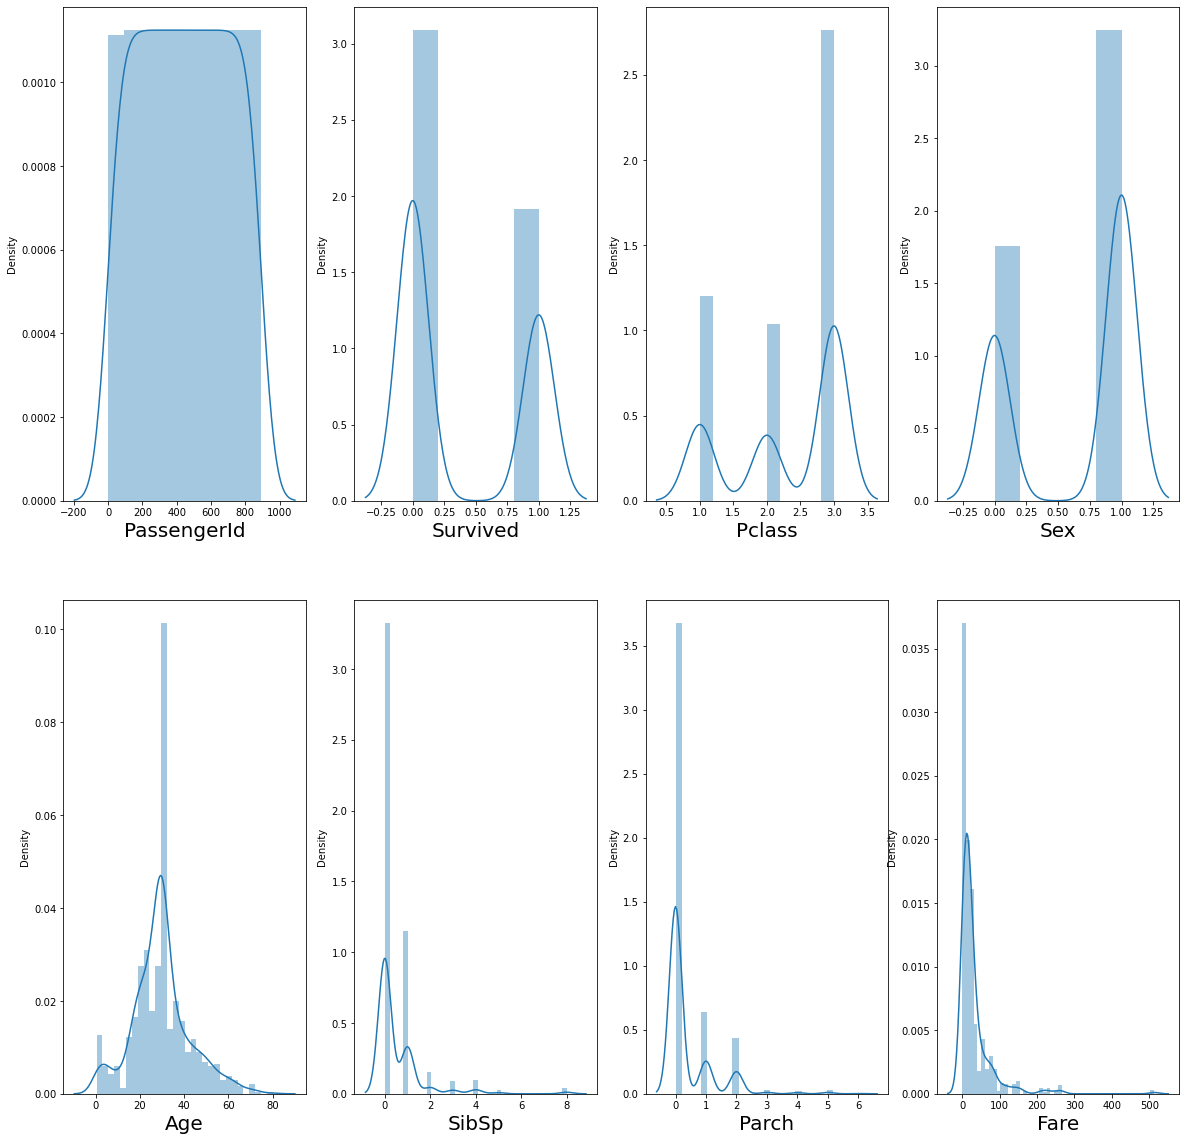

In [31]:
plt.figure(figsize=(20,20),facecolor='w')
plotno=1
for col in data:
    if plotno<=8:
        ax=plt.subplot(2,4,plotno)
        sns.distplot(data[col])
        plt.xlabel(col,fontsize=20)
    plotno+=1
plt.show()

In [32]:
X=data.drop(columns='Survived')
Y=data['Survived']

C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\hp\anaconda3\lib\site-

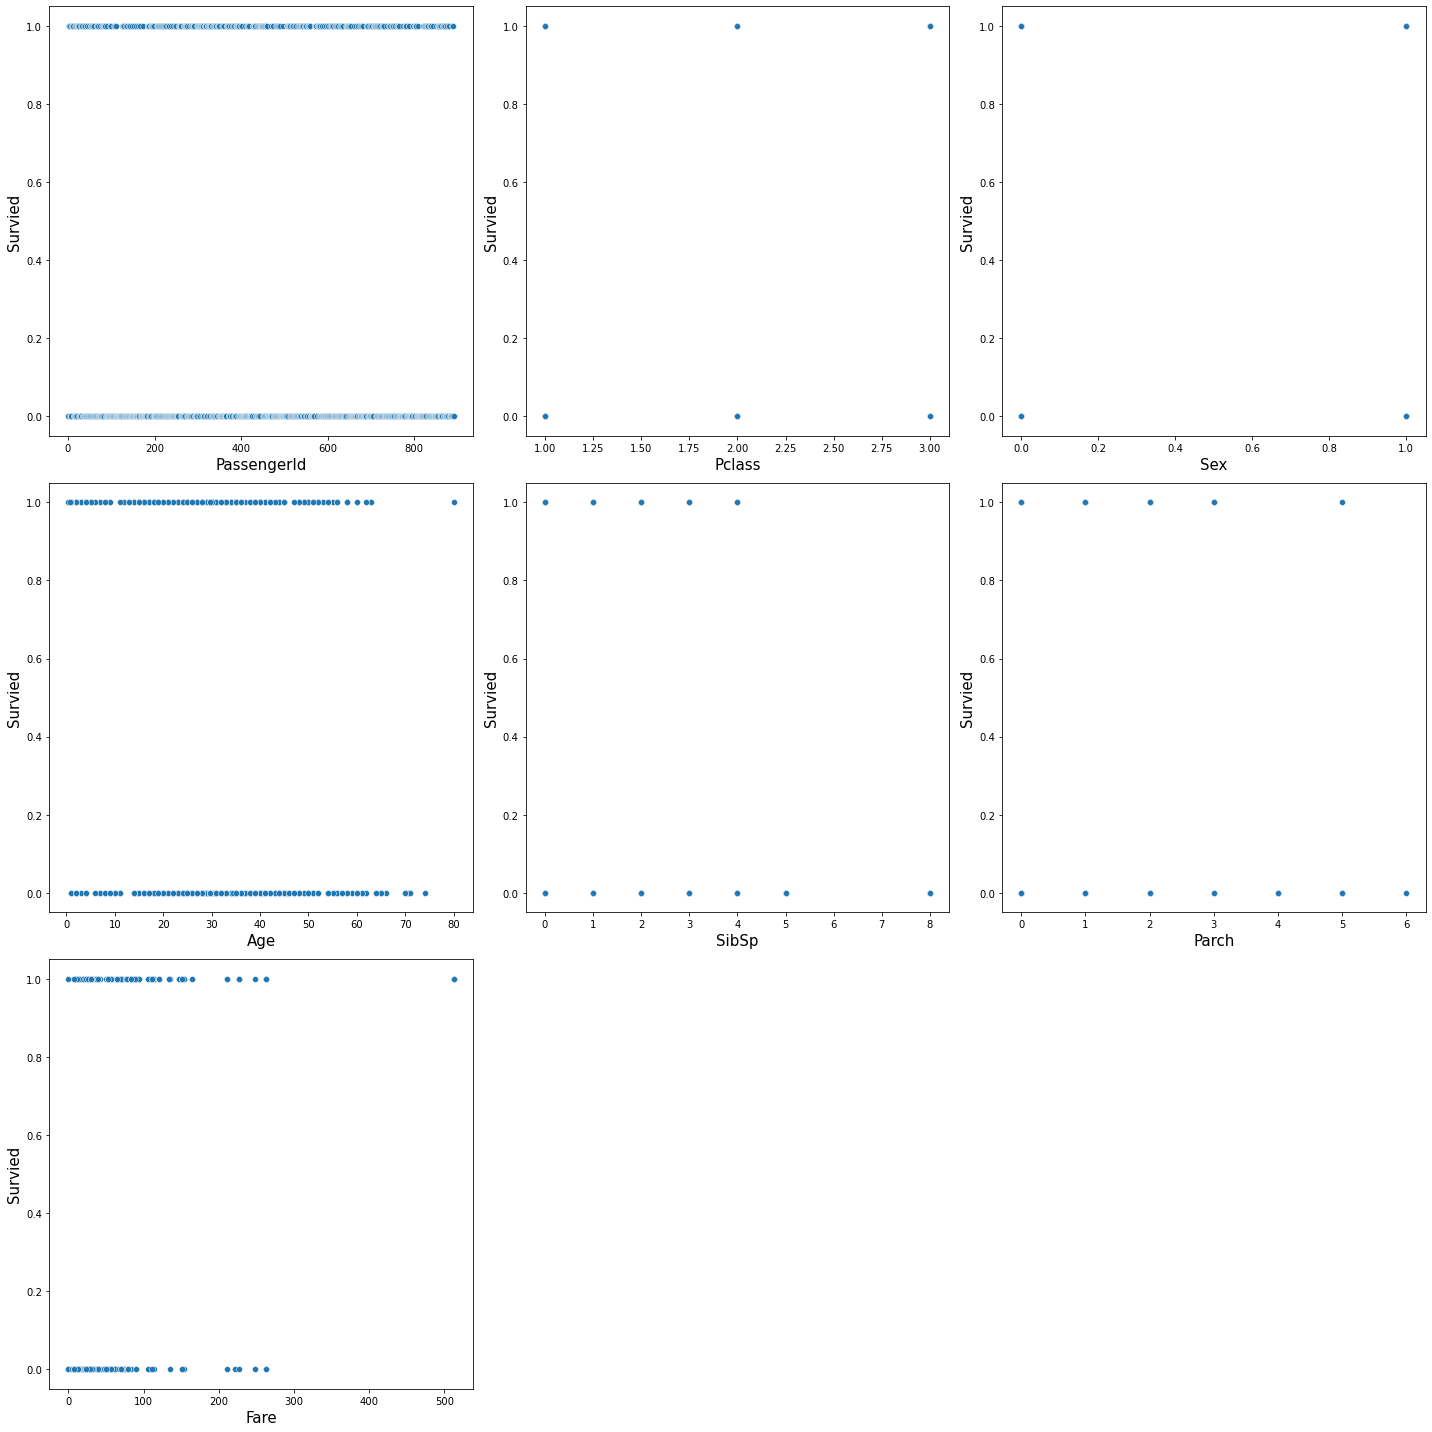

In [33]:
plotno=1
plt.figure(figsize=(20,20))
for col in X:
    if plotno<8:
        plt.subplot(3,3,plotno)
        sns.scatterplot(X[col],Y)
        plt.xlabel(col,fontsize=15)
        plt.ylabel("Survied",fontsize=15)
    plotno+=1
plt.tight_layout()

In [34]:
X.drop(columns='PassengerId',inplace=True)

In [35]:
from sklearn.preprocessing import LabelEncoder

In [36]:
lab_enc=LabelEncoder()

In [37]:
new_Embarked=lab_enc.fit_transform(data['Embarked'])
pd.Series(new_Embarked)
X['Embarked']=new_Embarked
X['Embarked'].unique()

new_cabin=lab_enc.fit_transform(data['Cabin'])
pd.Series(new_cabin)
X['Cabin']=new_cabin
X['Cabin'].unique()

array([2, 4, 6, 3, 0, 1, 5, 7])

In [38]:
X.sample(n=5)

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
477,3,1,29.0,1,0,7.0458,2,2
225,3,1,22.0,0,0,9.3500,2,2
408,3,1,21.0,0,0,7.7750,2,2
672,2,1,70.0,0,0,10.5000,2,2
13,3,1,39.0,1,5,31.2750,2,2


In [39]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,confusion_matrix,roc_curve,roc_auc_score
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
import matplotlib.pyplot as plt


In [40]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=.2,random_state=10)

In [41]:
lr=LogisticRegression()

In [42]:
lr.fit(X_train,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [44]:
y_predict_test = lr.predict(X_test)
y_predict_test

array([1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0], dtype=int64)

In [45]:
from sklearn.metrics import confusion_matrix , accuracy_score
cm = confusion_matrix(y_test, y_predict_test)
accuracy_score(y_test, y_predict_test)

0.8370786516853933